In [87]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
import glob 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
def connectcsv(files_path):
    dfs = []
    for file in files_path:
        df = pd.read_csv(file)
        selected_columns = ['ride_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
        df = df[selected_columns]
        df = df.dropna()
        df['start_lat'] = df['start_lat'].astype('float64')
        df['start_lng'] = df['start_lng'].astype('float64')
        df['end_lat'] = df['end_lat'].astype('float64')
        df['end_lng'] = df['end_lng'].astype('float64')
        df = df.sample(n=1000)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [101]:
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    return geodesic(start_coords, end_coords).miles

In [102]:
data_2020 = connectcsv(sorted(glob.glob('../Data/part2/2020*.csv')))
data_2020['distance_miles'] = data_2020.apply(calculate_distance, axis=1)
data_2020

,ride_id,start_lat,start_lng,end_lat,end_lng,distance_miles
0,7F7863BE085A5D40,38.934405,-77.032687,38.983525,-77.095367,4.783018
1,AEF2886CD91C65F6,38.909850,-77.034438,38.921074,-77.031887,0.786351
2,08DF3D25E4E3A2FA,38.951443,-77.340377,38.951443,-77.340377,0.000000
3,A974012992E5DB49,38.887378,-77.001955,38.905470,-77.002130,1.248013
4,C55D54B455A4BF83,38.912719,-77.022155,38.905737,-77.022270,0.481663
...,...,...,...,...,...,...
8995,33A12E3E967606A6,38.987000,-77.029417,38.983627,-77.006311,1.265560
8996,7CDBD6694C727B87,38.969503,-76.949205,38.960000,-76.980000,1.783273
8997,1A5C21EC88CB816C,38.897195,-76.983575,38.884260,-76.994736,1.076162
8998,9277C196381E3197,38.880012,-77.107854,38.897612,-77.080851,1.895571


In [103]:
data_2021 = connectcsv(sorted(glob.glob('../Data/part2/2021*.csv')))
data_2021['distance_miles'] = data_2021.apply(calculate_distance, axis=1)
data_2021.head()

/var/folders/4f/565zs95x5xb988rb96g8px_40000gn/T/ipykernel_20255/369998350.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,ride_id,start_lat,start_lng,end_lat,end_lng,distance_miles
0,F0EF67A0EB009084,38.928743,-77.012421,38.934242,-77.057896,2.479325
1,14CEFCBB24879CB0,38.890000,-77.000000,38.860000,-76.990000,2.138507
2,6CAFA9F740B2C9DF,38.930000,-77.040000,38.910000,-77.030000,1.481126
3,F4F3A7E37D7CE70C,38.876751,-77.000736,38.876300,-77.003700,0.162820
4,3893518F741C53B6,38.876893,-77.006072,38.884260,-76.994736,0.794893


In [ ]:
data_2022 = connectcsv(sorted(glob.glob('../Data/part2/2022*.csv')))
data_2022['distance_miles'] = data_2022.apply(calculate_distance, axis=1)
data_2022.head()

,ride_id,start_lat,start_lng,end_lat,end_lng,distance_miles
0,1B4445D591115BD9,38.820932,-77.053096,38.822738,-77.049265,0.241363
1,7F4A0E2F03EADEB7,38.903658,-77.031737,38.898243,-77.026235,0.476916
2,30DD8A84164843AD,38.903658,-77.031737,38.903819,-77.028400,0.180207
3,FC67665D7682D0A6,38.915604,-76.983683,38.901385,-76.941877,2.457422
4,7854F7CC4F631A1E,38.885434,-77.173605,38.887403,-77.176992,0.227578


In [ ]:
data_2020['Year'] = 2020
data_2021['Year'] = 2021
data_2022['Year'] = 2022
combined_df = pd.concat([data_2020, data_2021, data_2022], ignore_index=True)
combined_df.head()

,ride_id,start_lat,start_lng,end_lat,end_lng,distance_miles,Year
0,77A0F1B26D1597B1,38.905996,-77.039802,38.903819,-77.028400,0.632638,2020
1,8698F10128EA4F18,38.900711,-77.046449,38.903741,-77.042452,0.300189,2020
2,AA07819DC0F58872,38.941139,-77.061977,38.941139,-77.061977,0.000000,2020
3,DA909BCA92EF85AB,38.883450,-77.021741,38.883450,-77.021741,0.000000,2020
4,B36F1E14D8C6757E,38.880300,-76.986200,38.879200,-76.995300,0.496488,2020


In [ ]:
X = combined_df[['distance_miles']]  # Input feature
y = combined_df['Year']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Creating and training the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse, regressor.coef_, regressor.intercept_

/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

(0.7745499923866155, array([-0.00015786]), 2021.2281596604926)

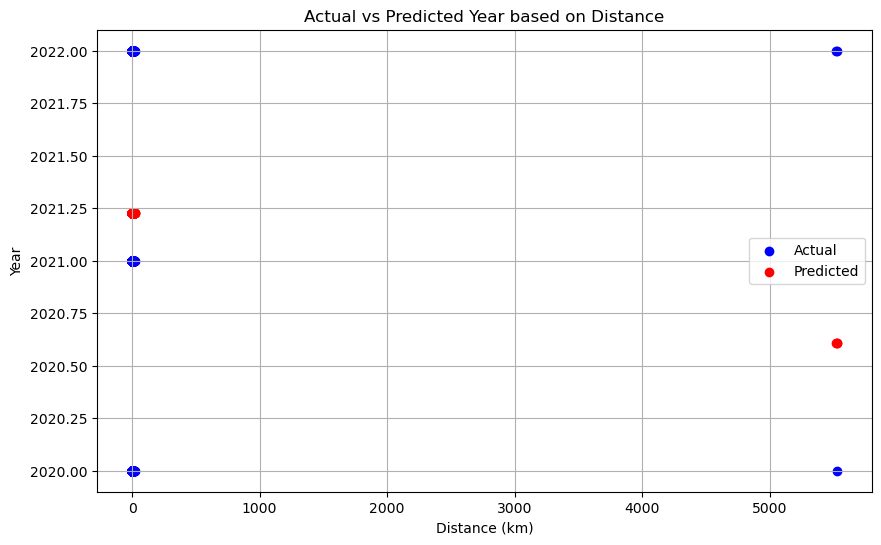

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Year based on Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Year')
plt.legend()
plt.grid(True)
plt.show()

/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

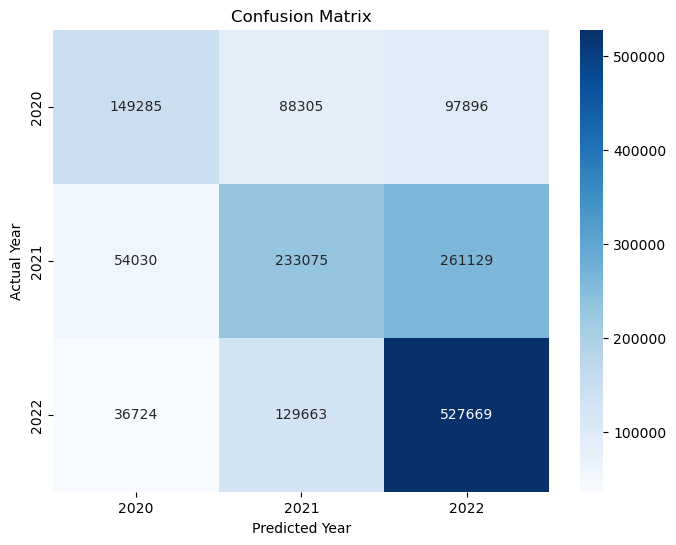

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Selecting the relevant features and the target variable
features = combined_df[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance_miles']]
target = combined_df['Year']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

conf_matrix = confusion_matrix(y_test, y_pred)

# Generating a classification report
class_report = classification_report(y_test, y_pred)
plt.figure(figsize=(8, 6))

# Creating a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
            xticklabels=[2020, 2021, 2022], yticklabels=[2020, 2021, 2022])

plt.title('Confusion Matrix')
plt.ylabel('Actual Year')
plt.xlabel('Predicted Year')
plt.show()